In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from scipy.stats import boxcox
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

In [124]:
df=pd.read_csv("termdeposit_train.csv")




In [125]:
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [126]:
df.tail()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no
31646,14156,55,management,divorced,secondary,no,204,yes,no,cellular,11,jul,1973,2,-1,0,unknown,yes


In [127]:
df.shape

(31647, 18)

In [128]:
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [129]:
df=df.drop_duplicates()


In [130]:
df.shape

(31647, 18)

In [131]:
df["job"].value_counts()

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

In [132]:
df["marital"].value_counts()

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64

In [133]:
df["education"].value_counts()

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64

In [134]:
df["default"].value_counts()

no     31062
yes      585
Name: default, dtype: int64

In [135]:
df["housing"].value_counts()

yes    17584
no     14063
Name: housing, dtype: int64

In [136]:
df["poutcome"].value_counts()

unknown    25929
failure     3362
other       1288
success     1068
Name: poutcome, dtype: int64

In [137]:
df.isnull().sum()


ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.6+ MB


In [139]:
df=df.drop("ID",axis=1)

In [140]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [141]:
catagorical_cols=[]
for x in df.dtypes.index:
    if df.dtypes[x]=="object":
        catagorical_cols.append(x)
        
        

In [142]:
print(f"object data type columns are : \n",catagorical_cols)

object data type columns are : 
 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']


In [143]:
numerical_cols=[]
for x in df.dtypes.index:
    if df.dtypes[x]=="int64":
        numerical_cols.append(x)

In [144]:
print(f"numerical data type columns are : \n",numerical_cols)

numerical data type columns are : 
 ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [145]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [146]:
df.describe(include="all")

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
count,31647.000000,31647,31647,31647,31647,31647.000000,31647,31647,31647,31647.000000,31647,31647.000000,31647.000000,31647.000000,31647.000000,31647,31647
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,6842,19095,16224,31062,NaN,17584,26516,20423,NaN,9669,NaN,NaN,NaN,NaN,25929,27932
mean,40.957247,NaN,NaN,NaN,NaN,1363.890258,NaN,NaN,NaN,15.835466,NaN,258.113534,2.765697,39.576042,0.574272,NaN,NaN
std,10.625134,NaN,NaN,NaN,NaN,3028.304293,NaN,NaN,NaN,8.337097,NaN,257.118973,3.113830,99.317592,2.422529,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,73.000000,NaN,NaN,NaN,8.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,450.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1431.000000,NaN,NaN,NaN,21.000000,NaN,318.500000,3.000000,-1.000000,0.000000,NaN,NaN


In [147]:
df.nunique().to_frame("unique values")

,unique values
age,76
job,12
marital,3
education,4
default,2
balance,6326
housing,2
loan,2
contact,3
day,31


In [148]:
for col in catagorical_cols:
    print(col)
    print(df[col].value_counts())
    print("="*50)
    
    

job
blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64
marital
married     19095
single       8922
divorced     3630
Name: marital, dtype: int64
education
secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64
default
no     31062
yes      585
Name: default, dtype: int64
housing
yes    17584
no     14063
Name: housing, dtype: int64
loan
no     26516
yes     5131
Name: loan, dtype: int64
contact
cellular     20423
unknown       9177
telephone     2047
Name: contact, dtype: int64
month
may    9669
jul    4844
aug    4333
jun    3738
nov    2783
apr    2055
feb    1827
jan     977
oct     512
sep     410
mar     342
dec     157
Name: month, dtype: int64
poutcome
unknown    25929
failure     3362
other     

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64


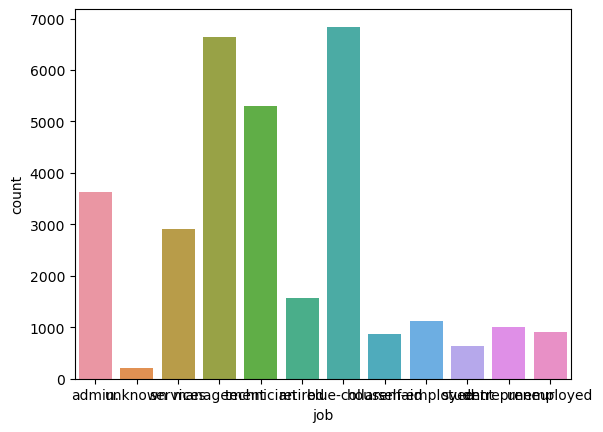

In [149]:
ax=sns.countplot(x="job",data=df[catagorical_cols])
print(df["job"].value_counts())

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64


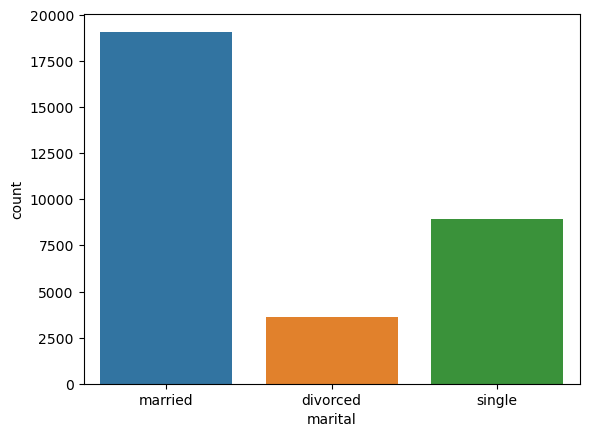

In [150]:
ax=sns.countplot(x="marital",data=df[catagorical_cols])
print(df["marital"].value_counts())

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64


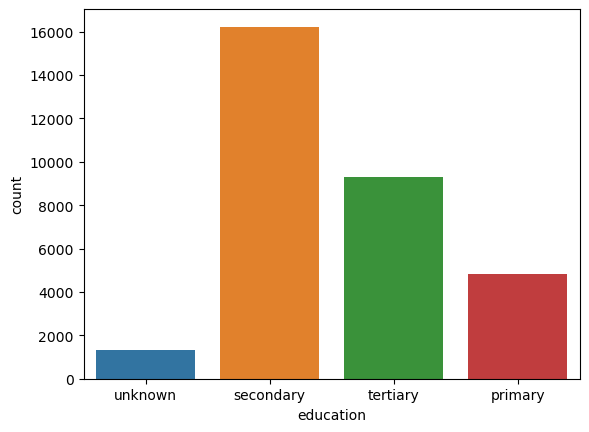

In [151]:
x=sns.countplot(x="education",data=df[catagorical_cols])
print(df["education"].value_counts())

no     31062
yes      585
Name: default, dtype: int64


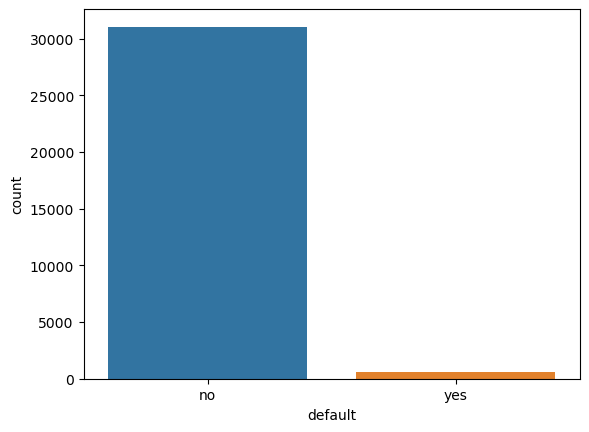

In [152]:
x=sns.countplot(x="default",data=df[catagorical_cols])
print(df["default"].value_counts())

yes    17584
no     14063
Name: housing, dtype: int64


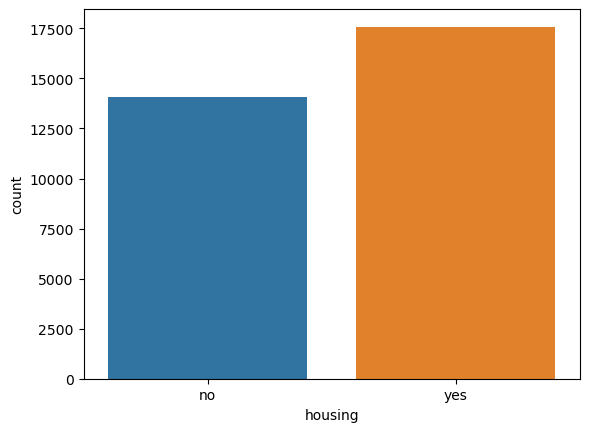

In [153]:
x=sns.countplot(x="housing",data=df[catagorical_cols])
print(df["housing"].value_counts())

no     26516
yes     5131
Name: loan, dtype: int64


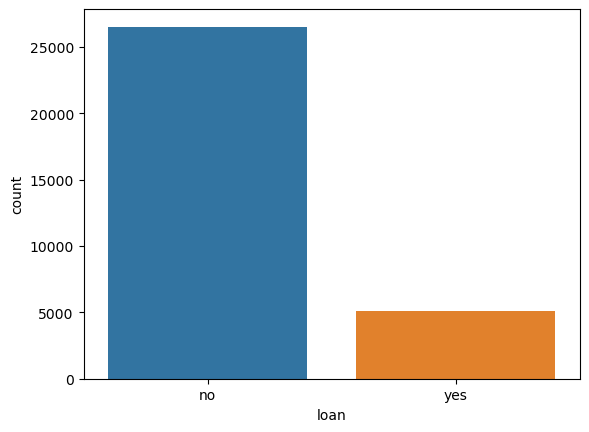

In [154]:
x=sns.countplot(x="loan",data=df[catagorical_cols])
print(df["loan"].value_counts())

cellular     20423
unknown       9177
telephone     2047
Name: contact, dtype: int64


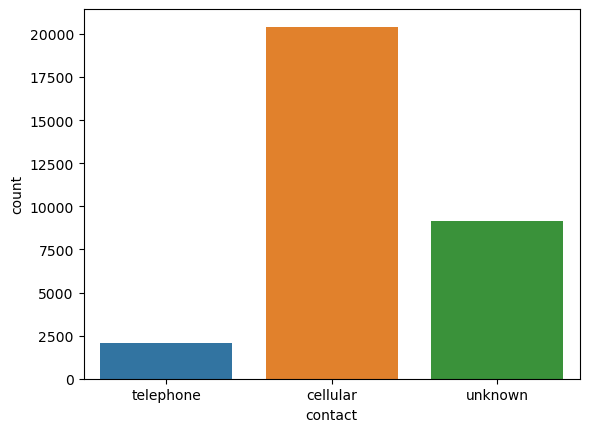

In [155]:
x=sns.countplot(x="contact",data=df[catagorical_cols])
print(df["contact"].value_counts())

may    9669
jul    4844
aug    4333
jun    3738
nov    2783
apr    2055
feb    1827
jan     977
oct     512
sep     410
mar     342
dec     157
Name: month, dtype: int64


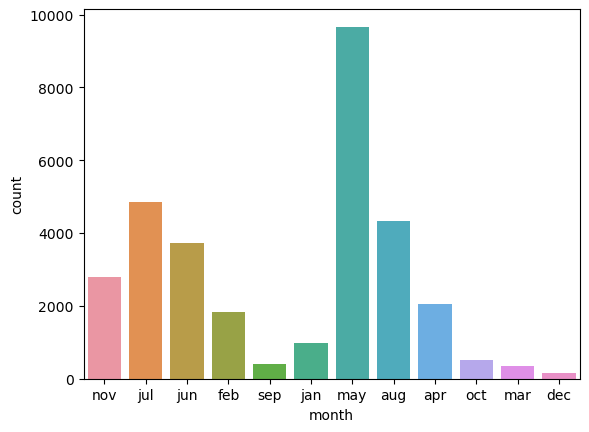

In [156]:
x=sns.countplot(x="month",data=df[catagorical_cols])
print(df["month"].value_counts())

unknown    25929
failure     3362
other       1288
success     1068
Name: poutcome, dtype: int64


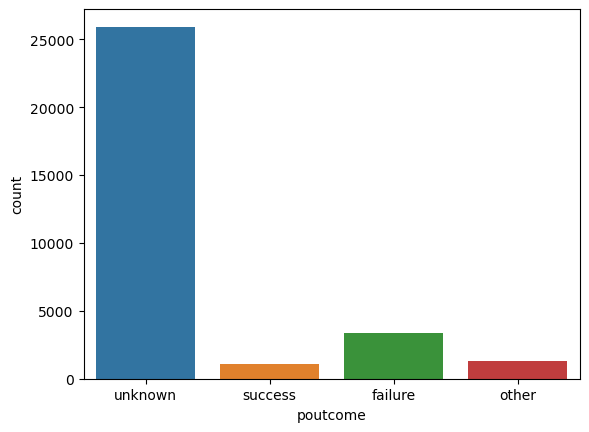

In [157]:
x=sns.countplot(x="poutcome",data=df[catagorical_cols])
print(df["poutcome"].value_counts())

no     27932
yes     3715
Name: subscribed, dtype: int64


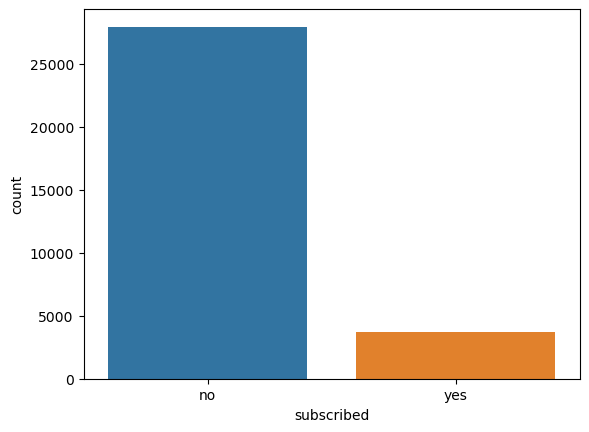

In [158]:
x=sns.countplot(x="subscribed",data=df[catagorical_cols])
print(df["subscribed"].value_counts())

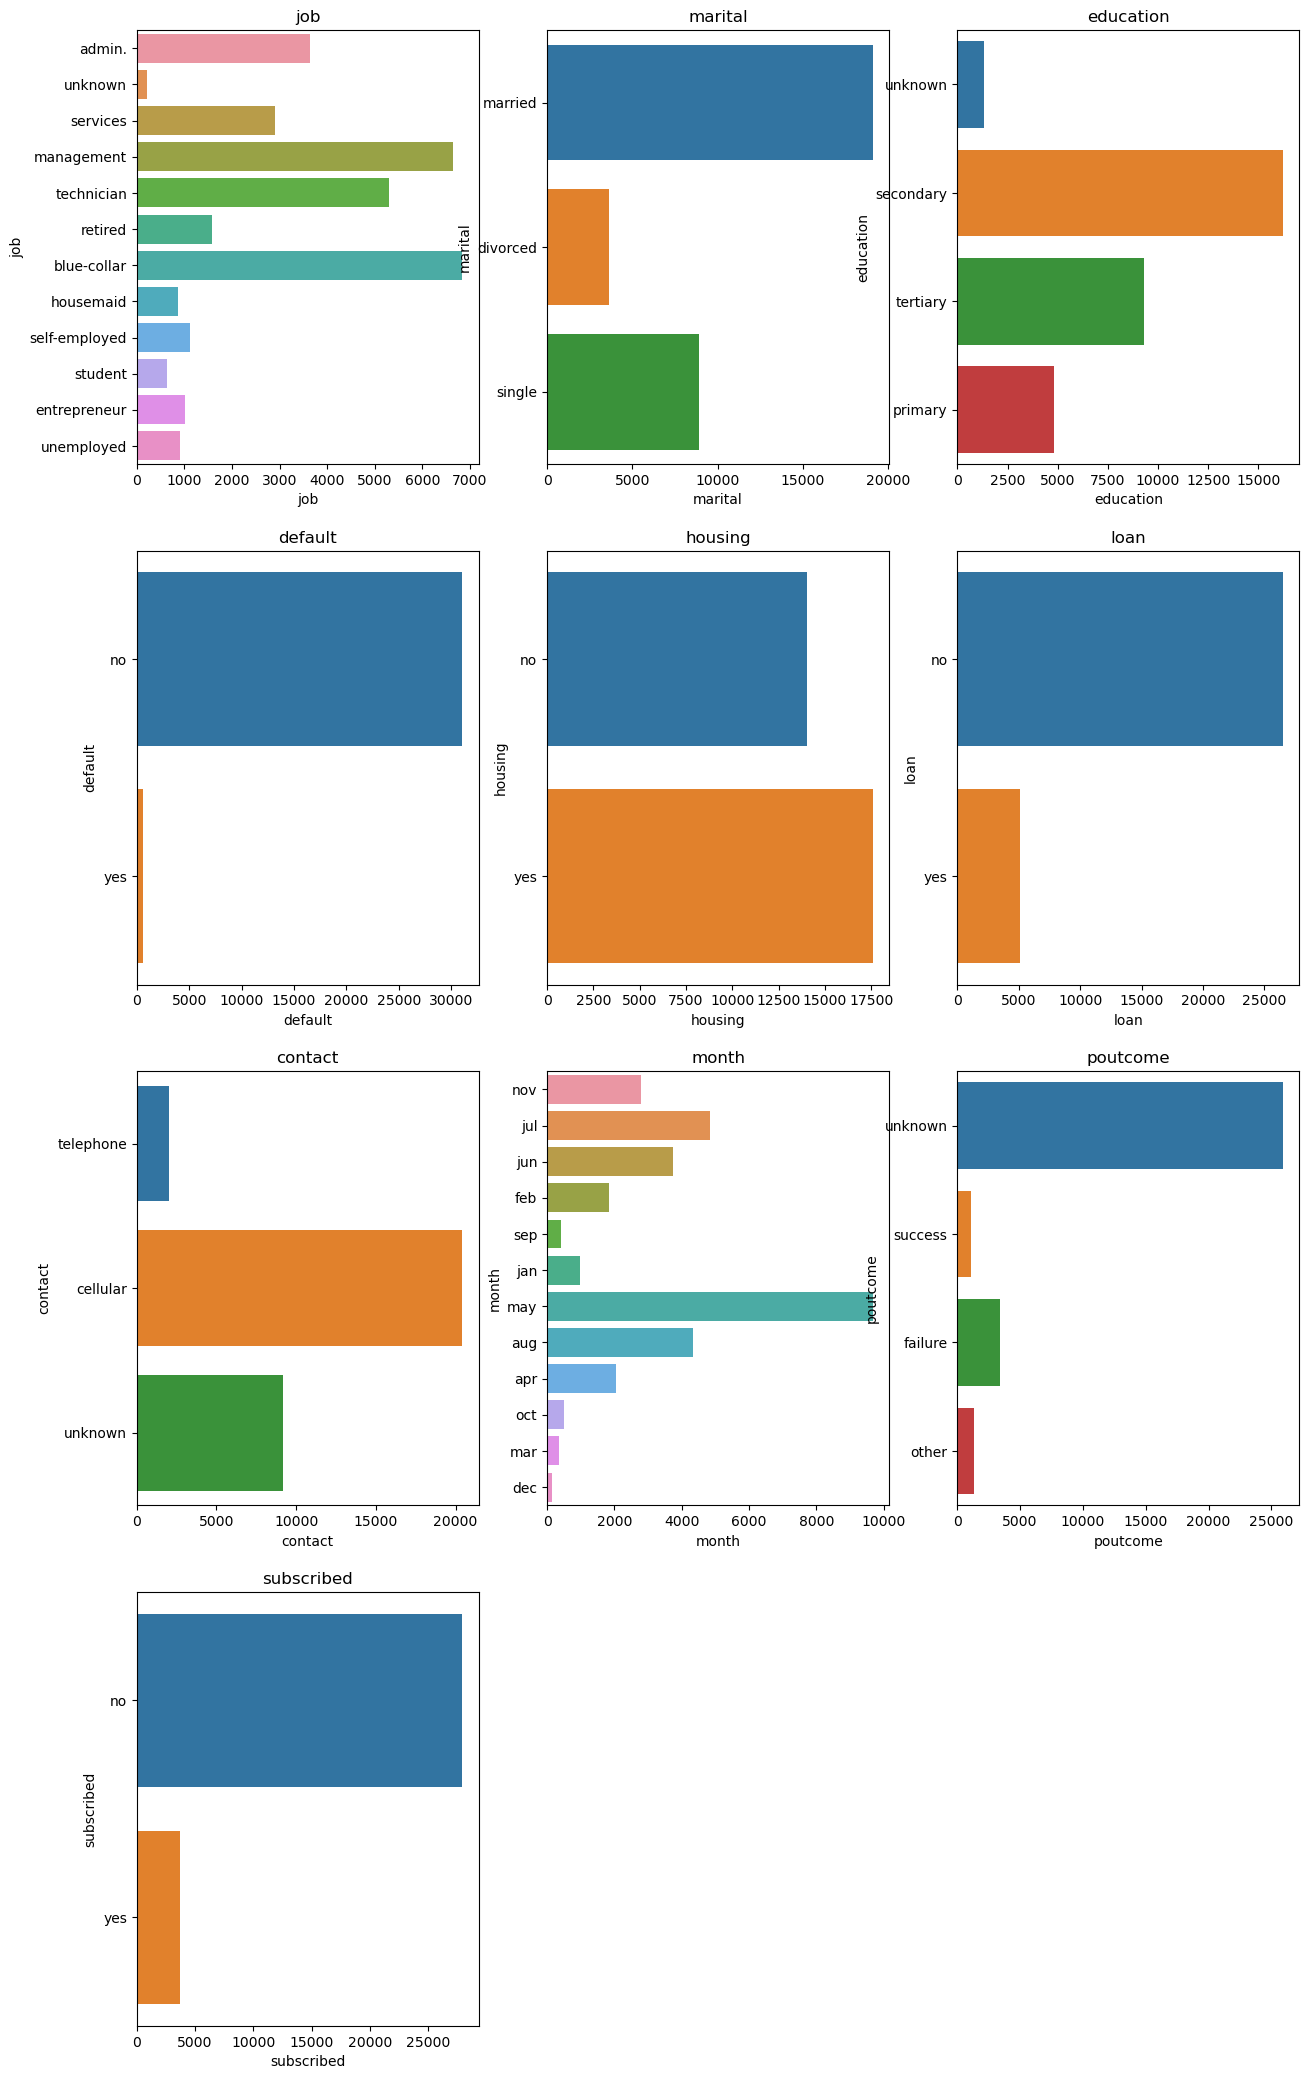

In [159]:
plt.figure(figsize=(15,80),facecolor="white")
plotnumber=1
for col in catagorical_cols:
    ax=plt.subplot(12,3,plotnumber)
    sns.countplot(y=col,data=df[catagorical_cols])
    plt.xlabel(col)
    plt.title(col)
    plotnumber+=1
plt.show()

0.6816067818884382


<Axes: xlabel='age', ylabel='Density'>

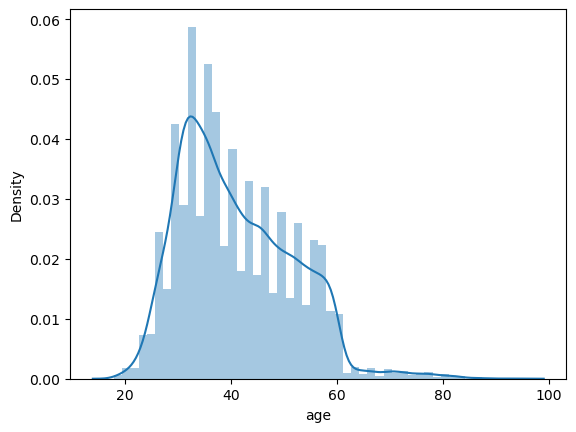

In [160]:
print(df["age"].skew())
sns.distplot(df["age"],kde=True)

7.995695573886313


<Axes: xlabel='balance', ylabel='Density'>

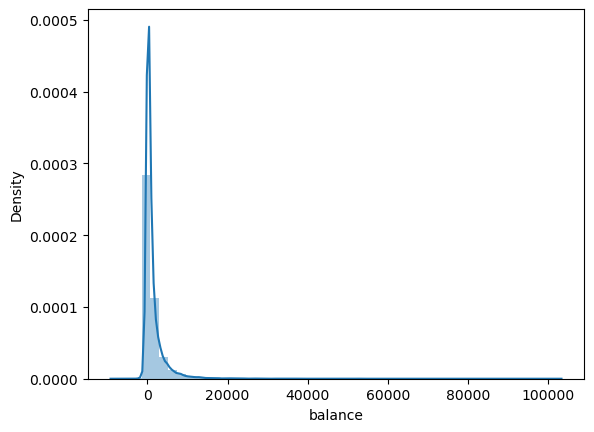

In [161]:
print(df["balance"].skew())
sns.distplot(df["balance"],kde=True)

0.08718543483770899


<Axes: xlabel='day', ylabel='Density'>

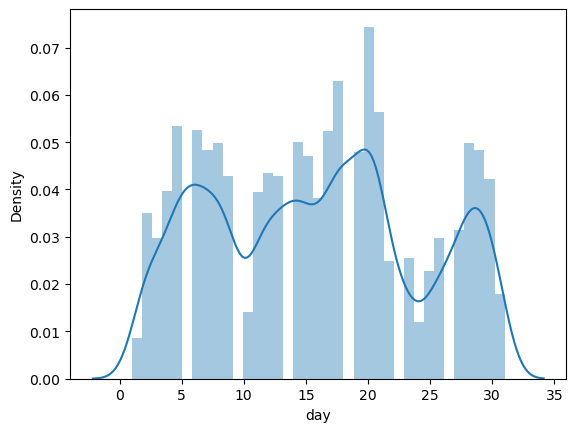

In [162]:
print(df["day"].skew())
sns.distplot(df["day"],kde=True)

3.1997657339236736


<Axes: xlabel='duration', ylabel='Density'>

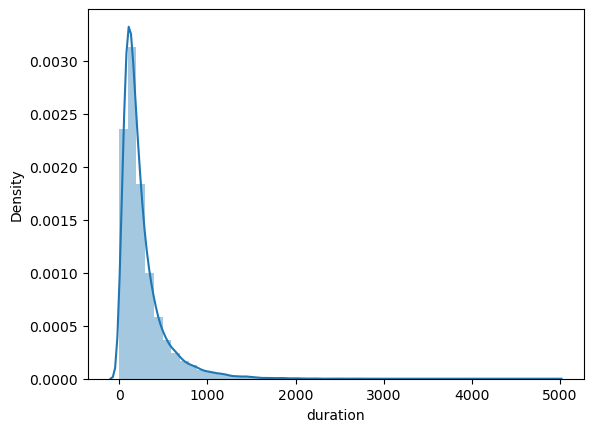

In [163]:
print(df["duration"].skew())
sns.distplot(df["duration"],kde=True)

4.873934933081073


<Axes: xlabel='campaign', ylabel='Density'>

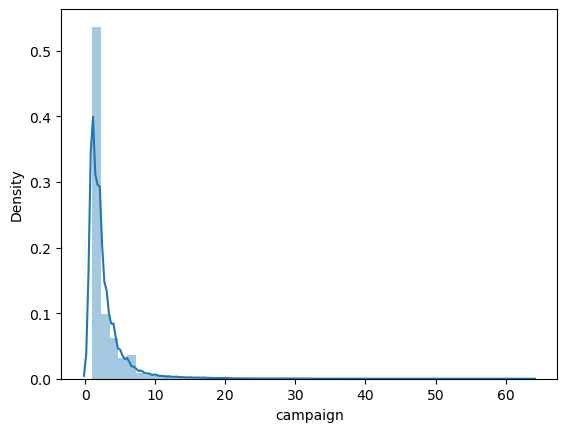

In [164]:
print(df["campaign"].skew())
sns.distplot(df["campaign"],kde=True)

2.642374162969253


<Axes: xlabel='pdays', ylabel='Density'>

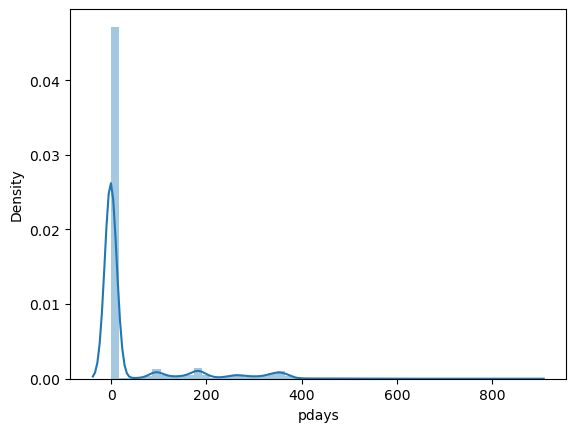

In [165]:
print(df["pdays"].skew())
sns.distplot(df["pdays"],kde=True)

49.30234792386907


<Axes: xlabel='previous', ylabel='Density'>

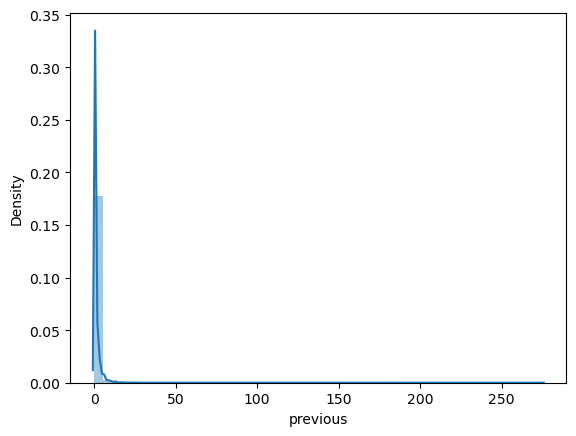

In [166]:
print(df["previous"].skew())
sns.distplot(df["previous"],kde=True)

<Axes: xlabel='age', ylabel='balance'>

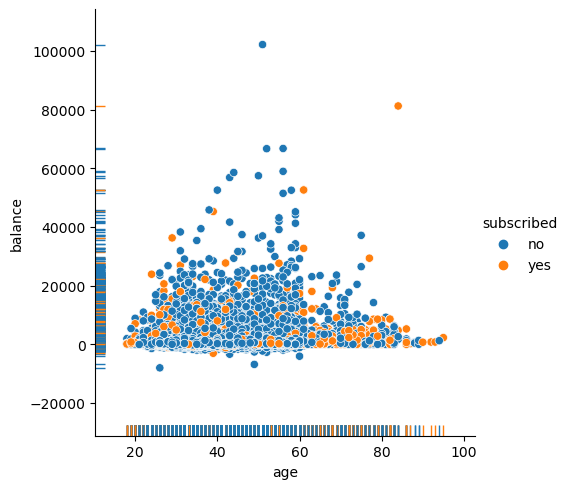

In [167]:
sns.relplot(data=df,x="age",y="balance",hue="subscribed")
sns.rugplot(data=df,x="age",y="balance",hue="subscribed",legend=False)

<Axes: xlabel='day', ylabel='campaign'>

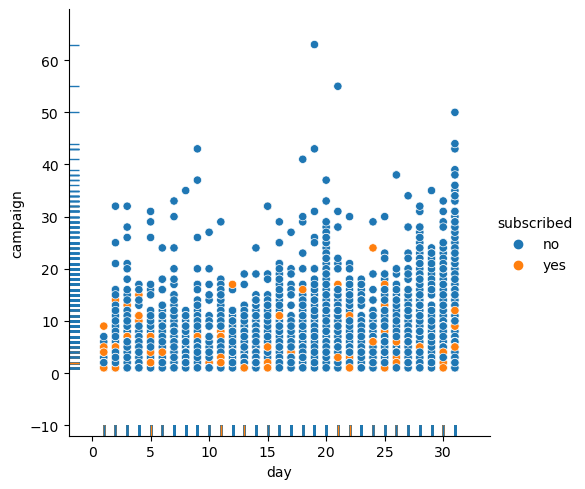

In [168]:
sns.relplot(data=df,x="day",y="campaign",hue="subscribed")
sns.rugplot(data=df,x="day",y="campaign",hue="subscribed",legend=False)

<Axes: xlabel='pdays', ylabel='previous'>

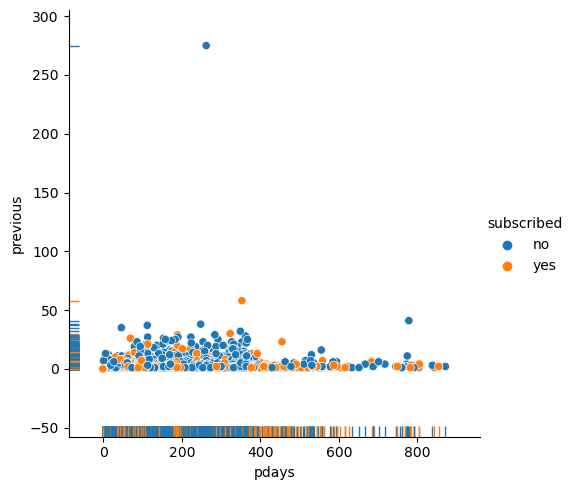

In [169]:

sns.relplot(data=df,x="pdays",y="previous",hue="subscribed")
sns.rugplot(data=df,x="pdays",y="previous",hue="subscribed",legend=False)

In [170]:
df.skew()

age          0.681607
balance      7.995696
day          0.087185
duration     3.199766
campaign     4.873935
pdays        2.642374
previous    49.302348
dtype: float64

4.873934933081073


<Axes: xlabel='campaign', ylabel='Density'>

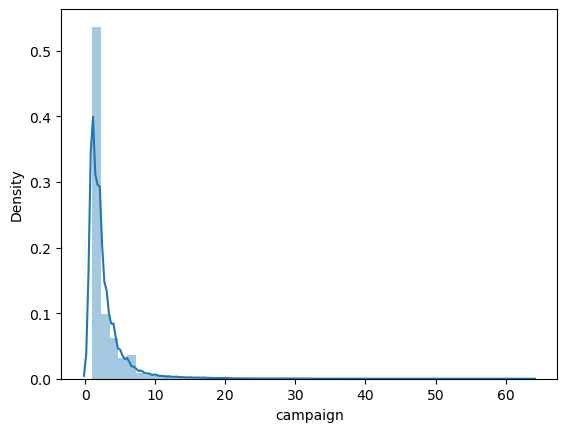

In [171]:
print(df["campaign"].skew())
sns.distplot(df["campaign"],kde=True)

<Axes: >

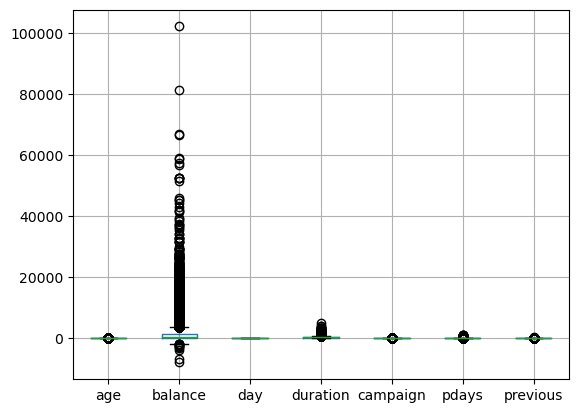

In [172]:
df.boxplot()

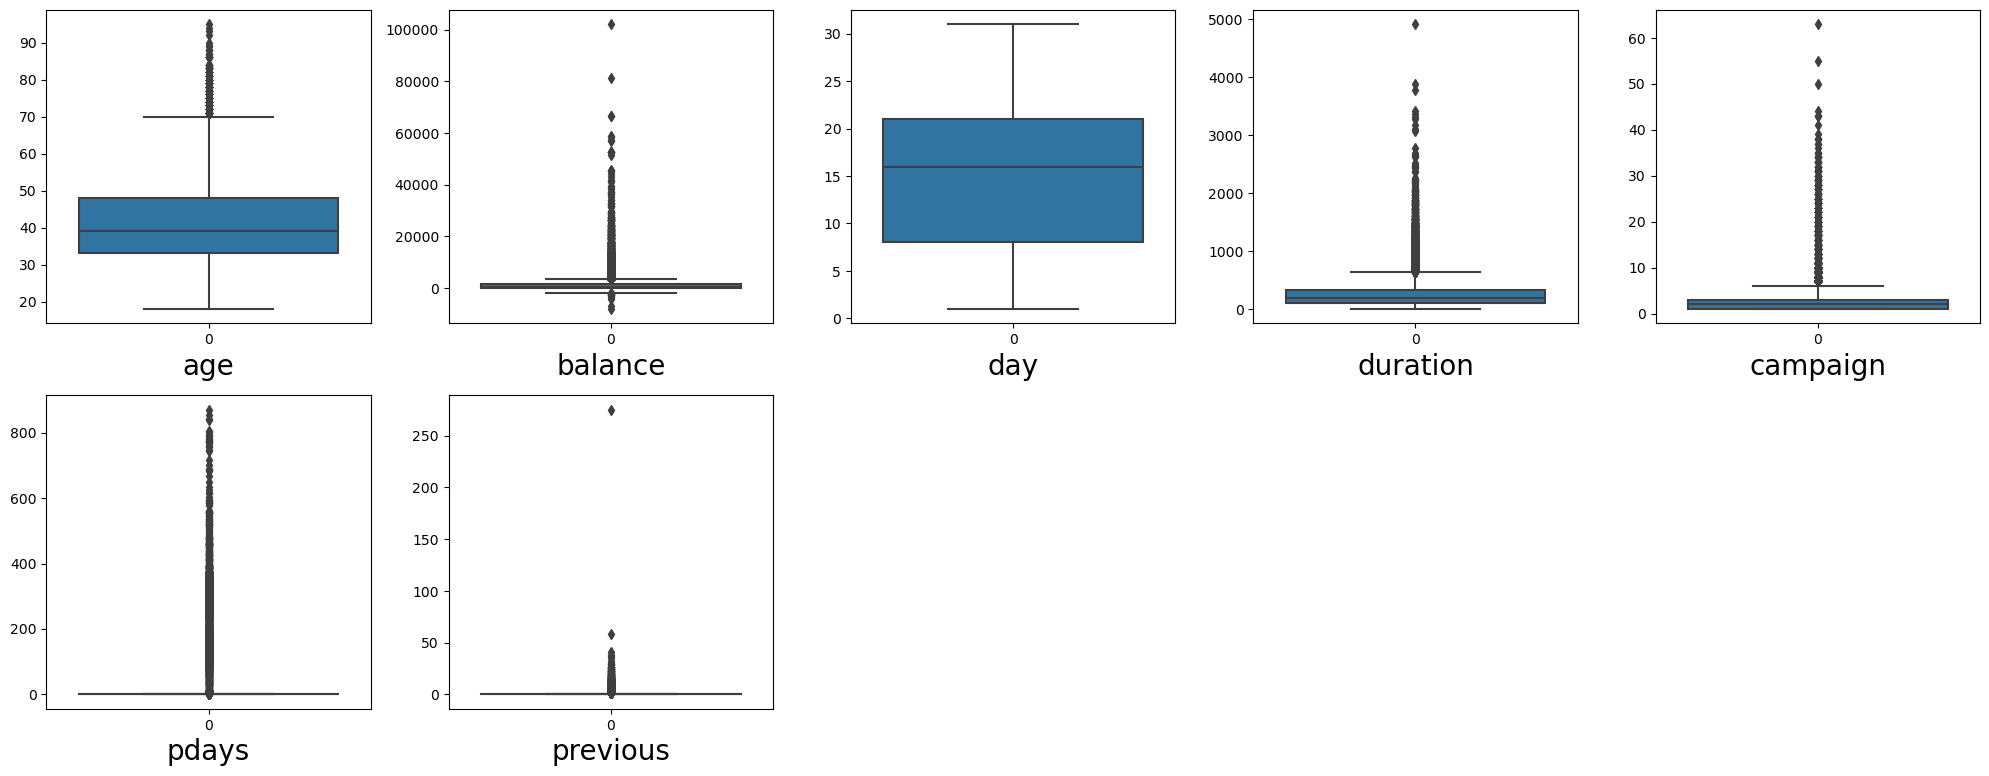

In [173]:
plt.figure(figsize=(20,15),facecolor="white")
plot_number=1

for column in df[numerical_cols]:
    if plot_number<=20:
        ax=plt.subplot(4,5,plot_number)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
        plot_number+=1
        
        
    
        
plt.tight_layout()

In [174]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.103245,-0.011056,-0.003870,0.005733,-0.021947,0.005761
balance,0.103245,1.000000,0.003461,0.024274,-0.012032,0.001789,0.013843
day,-0.011056,0.003461,1.000000,-0.032288,0.159168,-0.087626,-0.048752
duration,-0.003870,0.024274,-0.032288,1.000000,-0.080305,0.000529,0.001783
campaign,0.005733,-0.012032,0.159168,-0.080305,1.000000,-0.087570,-0.033151
pdays,-0.021947,0.001789,-0.087626,0.000529,-0.087570,1.000000,0.428938
previous,0.005761,0.013843,-0.048752,0.001783,-0.033151,0.428938,1.000000


<Axes: >

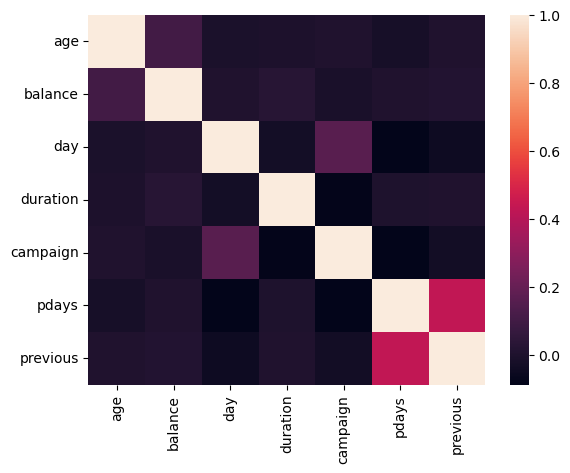

In [175]:
sns.heatmap(df.corr())

In [176]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [177]:
df.groupby(["subscribed","default"]).size()

subscribed  default
no          no         27388
            yes          544
yes         no          3674
            yes           41
dtype: int64

In [178]:
df.drop(["default"],axis=1,inplace=True)

In [179]:
df.groupby(["subscribed","pdays"]).size()

subscribed  pdays
no          -1       23553
             1           6
             2          24
             4           1
             5           7
                     ...  
yes          792         1
             804         1
             805         1
             842         1
             854         1
Length: 804, dtype: int64

In [180]:
df.drop(["pdays"],axis=1,inplace=True)


In [181]:
df.groupby(["age"],sort=True)["age"].count()

age
18     8
19    22
20    39
21    48
22    86
      ..
90     1
92     1
93     1
94     1
95     1
Name: age, Length: 76, dtype: int64

In [182]:
df.groupby(["subscribed","duration"],sort=True)["duration"].count()


subscribed  duration
no          0            1
            2            3
            3            3
            4           11
            5           20
                        ..
yes         2775         1
            3076         1
            3102         1
            3183         1
            3881         1
Name: duration, Length: 2381, dtype: int64

In [183]:
df=df[df["duration"]<3102]

In [184]:
df.head()


,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,subscribed
0,56,admin.,married,unknown,1933,no,no,telephone,19,nov,44,2,0,unknown,no
1,31,unknown,married,secondary,3,no,no,cellular,20,jul,91,2,0,unknown,no
2,27,services,married,secondary,891,yes,no,cellular,18,jul,240,1,0,unknown,no
3,57,management,divorced,tertiary,3287,no,no,cellular,22,jun,867,1,3,success,yes
4,31,technician,married,secondary,119,yes,no,cellular,4,feb,380,1,0,unknown,no


In [185]:
df.groupby(["subscribed","loan"]).size()

subscribed  loan
no          no      23127
            yes      4799
yes         no       3382
            yes       330
dtype: int64

In [186]:
df.groupby(["subscribed","campaign"]).size()

subscribed  campaign
no          1           10483
            2            7790
            3            3438
            4            2213
            5            1147
                        ...  
yes         16              2
            17              6
            20              1
            24              1
            32              1
Length: 65, dtype: int64

In [187]:
df.groupby(['subscribed','campaign'],sort=True)['campaign'].count()

subscribed  campaign
no          1           10483
            2            7790
            3            3438
            4            2213
            5            1147
                        ...  
yes         16              2
            17              6
            20              1
            24              1
            32              1
Name: campaign, Length: 65, dtype: int64

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31638 entries, 0 to 31646
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         31638 non-null  int64 
 1   job         31638 non-null  object
 2   marital     31638 non-null  object
 3   education   31638 non-null  object
 4   balance     31638 non-null  int64 
 5   housing     31638 non-null  object
 6   loan        31638 non-null  object
 7   contact     31638 non-null  object
 8   day         31638 non-null  int64 
 9   month       31638 non-null  object
 10  duration    31638 non-null  int64 
 11  campaign    31638 non-null  int64 
 12  previous    31638 non-null  int64 
 13  poutcome    31638 non-null  object
 14  subscribed  31638 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.9+ MB


In [189]:
categorical_cols=[]
for x in df.dtypes.index:
    if df.dtypes[x]=="object":
        catagorical_cols.append(x)

In [190]:
from sklearn.preprocessing import LabelEncoder

In [191]:
le=LabelEncoder


In [192]:
for i in df[categorical_cols]:
    
    df[i]=le.fit_transform(df[i])
    df

In [193]:
df.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,subscribed
0,56,admin.,married,unknown,1933,no,no,telephone,19,nov,44,2,0,unknown,no
1,31,unknown,married,secondary,3,no,no,cellular,20,jul,91,2,0,unknown,no
2,27,services,married,secondary,891,yes,no,cellular,18,jul,240,1,0,unknown,no
3,57,management,divorced,tertiary,3287,no,no,cellular,22,jun,867,1,3,success,yes
4,31,technician,married,secondary,119,yes,no,cellular,4,feb,380,1,0,unknown,no


In [194]:
df["job"].value_counts()

blue-collar      6840
management       6638
technician       5306
admin.           3628
services         2902
retired          1574
self-employed    1122
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

In [195]:
df["marital"].value_counts()

married     19088
single       8920
divorced     3630
Name: marital, dtype: int64

In [196]:
df["education"].value_counts()

secondary    16218
tertiary      9298
primary       4808
unknown       1314
Name: education, dtype: int64

In [197]:
df["contact"].value_counts()

cellular     20420
unknown       9173
telephone     2045
Name: contact, dtype: int64

In [198]:
df["month"].value_counts()

may    9668
jul    4844
aug    4330
jun    3736
nov    2782
apr    2055
feb    1826
jan     977
oct     511
sep     410
mar     342
dec     157
Name: month, dtype: int64

In [199]:
df.replace({"job":{"unknown":1,"student":2,"unemployed":3,"housemaid":4,"entrepreneur":5,"self-employed":6,"retired":7,"technician":8,"services":9,"management":10,"admin.":11,"blue-collar":12},"marital":{"divorced":1,"married":2,"single":3},"education":{"unknown":1,"primary":2,"secondary":3,"tertiary":4},"contact":{"unknown":0,"telephone":1,"cellular":2}},inplace=True)

In [200]:
df.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,subscribed
0,56,11,2,1,1933,no,no,1,19,nov,44,2,0,unknown,no
1,31,1,2,3,3,no,no,2,20,jul,91,2,0,unknown,no
2,27,9,2,3,891,yes,no,2,18,jul,240,1,0,unknown,no
3,57,10,1,4,3287,no,no,2,22,jun,867,1,3,success,yes
4,31,8,2,3,119,yes,no,2,4,feb,380,1,0,unknown,no


In [201]:
df["housing"].value_counts()

yes    17581
no     14057
Name: housing, dtype: int64

In [202]:
df["loan"].value_counts()

no     26509
yes     5129
Name: loan, dtype: int64

In [203]:
df["month"].value_counts()

may    9668
jul    4844
aug    4330
jun    3736
nov    2782
apr    2055
feb    1826
jan     977
oct     511
sep     410
mar     342
dec     157
Name: month, dtype: int64

In [204]:
df.replace({"housing":{"yes":1,"no":0},"loan":{"yes":1,"no":0},"month":{"jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12}},inplace=True)

In [205]:
df.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,subscribed
0,56,11,2,1,1933,0,0,1,19,11,44,2,0,unknown,no
1,31,1,2,3,3,0,0,2,20,7,91,2,0,unknown,no
2,27,9,2,3,891,1,0,2,18,7,240,1,0,unknown,no
3,57,10,1,4,3287,0,0,2,22,6,867,1,3,success,yes
4,31,8,2,3,119,1,0,2,4,2,380,1,0,unknown,no


In [206]:
df["poutcome"].value_counts()

unknown    25920
failure     3362
other       1288
success     1068
Name: poutcome, dtype: int64

In [207]:
df.replace({"poutcome":{"failure":0,"unknown":1,"other":2,"success":3}},inplace=True)

In [208]:
df.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,subscribed
0,56,11,2,1,1933,0,0,1,19,11,44,2,0,1,no
1,31,1,2,3,3,0,0,2,20,7,91,2,0,1,no
2,27,9,2,3,891,1,0,2,18,7,240,1,0,1,no
3,57,10,1,4,3287,0,0,2,22,6,867,1,3,3,yes
4,31,8,2,3,119,1,0,2,4,2,380,1,0,1,no


In [209]:
df.replace({"subscribed":{"yes":1,"no":0}},inplace=True)

In [210]:
x=df.drop(["subscribed"],axis=1)

In [211]:
y=df["subscribed"]

In [212]:
x

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome
0,56,11,2,1,1933,0,0,1,19,11,44,2,0,1
1,31,1,2,3,3,0,0,2,20,7,91,2,0,1
2,27,9,2,3,891,1,0,2,18,7,240,1,0,1
3,57,10,1,4,3287,0,0,2,22,6,867,1,3,3
4,31,8,2,3,119,1,0,2,4,2,380,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,10,3,4,0,1,0,2,12,5,116,2,0,1
31643,53,10,1,4,380,0,1,2,5,6,438,2,0,1
31644,32,10,3,4,312,0,0,2,7,8,37,3,0,1
31645,57,8,2,3,225,1,0,1,15,5,22,7,12,0


In [213]:
y

0        0
1        0
2        0
3        1
4        0
        ..
31642    0
31643    1
31644    0
31645    0
31646    1
Name: subscribed, Length: 31638, dtype: int64

In [214]:
y.value_counts()

0    27926
1     3712
Name: subscribed, dtype: int64

In [215]:
from imblearn.over_sampling import SMOTE

In [216]:
sm=SMOTE()

In [217]:
x,y=sm.fit_resample(x,y)

In [218]:
y.value_counts()

0    27926
1    27926
Name: subscribed, dtype: int64

In [219]:
scaler=StandardScaler()
X=scaler.fit_transform(x)

In [220]:
X

array([[ 1.37899577,  0.90598191, -0.13669616, ..., -0.14102593,
        -0.32418277, -0.04752591],
       [-0.91038646, -3.06140937, -0.13669616, ..., -0.14102593,
        -0.32418277, -0.04752591],
       [-1.27668762,  0.11250366, -0.13669616, ..., -0.52791035,
        -0.32418277, -0.04752591],
       ...,
       [-0.08620886, -0.28423547, -0.13669616, ..., -0.52791035,
        -0.32418277, -0.04752591],
       [-0.72723588,  0.50924279,  1.52267223, ..., -0.52791035,
        -0.32418277, -0.04752591],
       [-0.17778415, -1.07771373, -1.79606455, ..., -0.52791035,
        -0.32418277, -0.04752591]])

In [221]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [222]:
x_train.shape

(44681, 14)

In [223]:
x_test.shape

(11171, 14)

In [224]:
y_train.shape

(44681,)

In [225]:
y_test.shape

(11171,)

In [226]:
def classify(clf,X,y):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
    
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)
    acc_score=(accuracy_score(y_test,pred))
    print("Accuracy Score:",acc_score)
    print("confusion matrix : \n",confusion_matrix(y_test,pred))
    

In [227]:
lr=LogisticRegression()

In [228]:
lr.fit(x_train,y_train)

LogisticRegression()

In [229]:
pred=lr.predict(x_test)


In [230]:
print("accuracy score",accuracy_score(pred,y_test))

accuracy score 0.8404798138035986


In [231]:
print("confusion_matrix \n",confusion_matrix(pred,y_test))

confusion_matrix 
 [[4625  796]
 [ 986 4764]]


In [232]:
print("classification report",classification_report(pred,y_test))

classification report               precision    recall  f1-score   support

           0       0.82      0.85      0.84      5421
           1       0.86      0.83      0.84      5750

    accuracy                           0.84     11171
   macro avg       0.84      0.84      0.84     11171
weighted avg       0.84      0.84      0.84     11171



In [233]:
error_score=metrics.r2_score(y_test,pred)

In [234]:
print(error_score)

0.3619059555421069


In [235]:
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
rn_acc=accuracy_score(y_test,predrf)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))


0.9311610419837079
[[5096  515]
 [ 254 5306]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      5611
           1       0.91      0.95      0.93      5560

    accuracy                           0.93     11171
   macro avg       0.93      0.93      0.93     11171
weighted avg       0.93      0.93      0.93     11171



In [236]:
ad=AdaBoostClassifier(n_estimators=100,algorithm="SAMME.R")
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
ad_acc=accuracy_score(y_test,ad_pred)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.8782561990869215
[[4851  760]
 [ 600 4960]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.88      5611
           1       0.87      0.89      0.88      5560

    accuracy                           0.88     11171
   macro avg       0.88      0.88      0.88     11171
weighted avg       0.88      0.88      0.88     11171



In [237]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
gb_pred=gb.predict(x_test)
gb_acc=accuracy_score(y_test,gb_pred)
print(accuracy_score(y_test,gb_pred))
print(confusion_matrix(y_test,gb_pred))
print(classification_report(y_test,gb_pred))

0.8921314116909856
[[4856  755]
 [ 450 5110]]
              precision    recall  f1-score   support

           0       0.92      0.87      0.89      5611
           1       0.87      0.92      0.89      5560

    accuracy                           0.89     11171
   macro avg       0.89      0.89      0.89     11171
weighted avg       0.89      0.89      0.89     11171



In [238]:
knc=KNeighborsClassifier(n_neighbors=5)
knc.fit(x_train,y_train)
knc_pred=knc.predict(x_test)
knc_acc=accuracy_score(y_test,knc_pred)
print(accuracy_score(y_test,knc_pred))
print(confusion_matrix(y_test,knc_pred))
print(classification_report(y_test,knc_pred))

0.8960701817205263
[[4892  719]
 [ 442 5118]]
              precision    recall  f1-score   support

           0       0.92      0.87      0.89      5611
           1       0.88      0.92      0.90      5560

    accuracy                           0.90     11171
   macro avg       0.90      0.90      0.90     11171
weighted avg       0.90      0.90      0.90     11171



In [239]:
DecTree = DecisionTreeClassifier()
DecTree.fit(x_train, y_train)
y_pred = DecTree.predict(x_test)
dec_acc = metrics.accuracy_score(y_pred,y_test)
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.8906096141795721
[[4917  528]
 [ 694 5032]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      5445
           1       0.91      0.88      0.89      5726

    accuracy                           0.89     11171
   macro avg       0.89      0.89      0.89     11171
weighted avg       0.89      0.89      0.89     11171



In [240]:
pd.DataFrame([['AdaBoost',ad_acc],['KNeighborsClassifier',knc_acc],['GradientBoostingClassifier',gb_acc],
                             ['Decision Tree',dec_acc],['Random Forest',rn_acc]],
                                 columns=['Model','Accuracy'])


,Model,Accuracy
0,AdaBoost,0.878256
1,KNeighborsClassifier,0.896070
2,GradientBoostingClassifier,0.892131
3,Decision Tree,0.890610
4,Random Forest,0.931161


In [241]:
import pickle

In [242]:
filename="bankproject.pkl"

In [243]:
pickle.dump(rf,open("filename","wb"))

In [245]:
loaded_model=pickle.load(open("filename","rb"))

In [246]:
result=loaded_model.score(x_test,y_test)

In [247]:
print(result*100)

93.11610419837079


In [248]:
dftest=pd.read_csv("termdeposit_test.csv")

In [249]:
dftest

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [251]:
dftest=dftest.drop("default",axis=1)


In [252]:
dftest=dftest.drop("pdays",axis=1)

In [254]:
dftest=dftest.drop("ID",axis=1)

In [255]:
dftest

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome
0,32,services,married,secondary,118,yes,no,cellular,15,may,20,6,0,unknown
1,78,retired,divorced,primary,2787,no,no,telephone,1,jul,372,1,0,unknown
2,31,self-employed,single,tertiary,144,yes,no,unknown,16,may,676,1,0,unknown
3,57,services,single,primary,3777,yes,no,telephone,13,may,65,2,0,unknown
4,45,blue-collar,divorced,secondary,-705,no,yes,unknown,3,jul,111,1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,management,married,tertiary,45,no,no,cellular,28,aug,148,4,0,unknown
13560,54,blue-collar,married,primary,2281,yes,no,unknown,20,jun,158,1,0,unknown
13561,35,retired,married,primary,285,yes,no,cellular,29,jan,136,1,0,unknown
13562,29,admin.,single,secondary,464,no,no,cellular,9,nov,208,2,3,success


In [256]:
dftest.replace({"housing":{"yes":1,"no":0},"loan":{"yes":1,"no":0},"month":{"jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12}},inplace=True)

In [257]:
dftest

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome
0,32,services,married,secondary,118,1,0,cellular,15,5,20,6,0,unknown
1,78,retired,divorced,primary,2787,0,0,telephone,1,7,372,1,0,unknown
2,31,self-employed,single,tertiary,144,1,0,unknown,16,5,676,1,0,unknown
3,57,services,single,primary,3777,1,0,telephone,13,5,65,2,0,unknown
4,45,blue-collar,divorced,secondary,-705,0,1,unknown,3,7,111,1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,management,married,tertiary,45,0,0,cellular,28,8,148,4,0,unknown
13560,54,blue-collar,married,primary,2281,1,0,unknown,20,6,158,1,0,unknown
13561,35,retired,married,primary,285,1,0,cellular,29,1,136,1,0,unknown
13562,29,admin.,single,secondary,464,0,0,cellular,9,11,208,2,3,success


In [258]:
dftest.replace({"job":{"unknown":1,"student":2,"unemployed":3,"housemaid":4,"entrepreneur":5,"self-employed":6,"retired":7,"technician":8,"services":9,"management":10,"admin.":11,"blue-collar":12},"marital":{"divorced":1,"married":2,"single":3},"education":{"unknown":1,"primary":2,"secondary":3,"tertiary":4},"contact":{"unknown":0,"telephone":1,"cellular":2}},inplace=True)

In [259]:
dftest

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome
0,32,9,2,3,118,1,0,2,15,5,20,6,0,unknown
1,78,7,1,2,2787,0,0,1,1,7,372,1,0,unknown
2,31,6,3,4,144,1,0,0,16,5,676,1,0,unknown
3,57,9,3,2,3777,1,0,1,13,5,65,2,0,unknown
4,45,12,1,3,-705,0,1,0,3,7,111,1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,10,2,4,45,0,0,2,28,8,148,4,0,unknown
13560,54,12,2,2,2281,1,0,0,20,6,158,1,0,unknown
13561,35,7,2,2,285,1,0,2,29,1,136,1,0,unknown
13562,29,11,3,3,464,0,0,2,9,11,208,2,3,success


In [260]:
dftest.replace({"poutcome":{"failure":0,"unknown":1,"other":2,"success":3}},inplace=True)

In [261]:
dftest

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome
0,32,9,2,3,118,1,0,2,15,5,20,6,0,1
1,78,7,1,2,2787,0,0,1,1,7,372,1,0,1
2,31,6,3,4,144,1,0,0,16,5,676,1,0,1
3,57,9,3,2,3777,1,0,1,13,5,65,2,0,1
4,45,12,1,3,-705,0,1,0,3,7,111,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,10,2,4,45,0,0,2,28,8,148,4,0,1
13560,54,12,2,2,2281,1,0,0,20,6,158,1,0,1
13561,35,7,2,2,285,1,0,2,29,1,136,1,0,1
13562,29,11,3,3,464,0,0,2,9,11,208,2,3,3


In [263]:
testpredict=rf.predict(dftest)

In [264]:
testpredict

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [272]:
finalprediction=testpredict

In [273]:
dffinal=pd.DataFrame(finalprediction)

In [274]:
dffinal

,0
0,0
1,1
2,0
3,0
4,0
...,...
13559,0
13560,0
13561,0
13562,0
